In [ ]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

,time,statistics.infectedCount,statistics.healthyCount,statistics.infectedWithoutSymptomsCount,statistics.recoverdCount,statistics.deadCount,statistics.quarantinedCount
0,0,0,4490,510,0,0,0
1,100,0,4490,510,0,0,0
2,200,0,4490,510,0,0,0
3,300,0,4490,510,0,0,0
4,400,0,4490,510,0,0,0
...,...,...,...,...,...,...,...
289,28900,0,1,0,4762,237,0
290,29000,0,1,0,4762,237,0
291,29100,0,1,0,4762,237,0
292,29200,0,1,0,4762,237,0


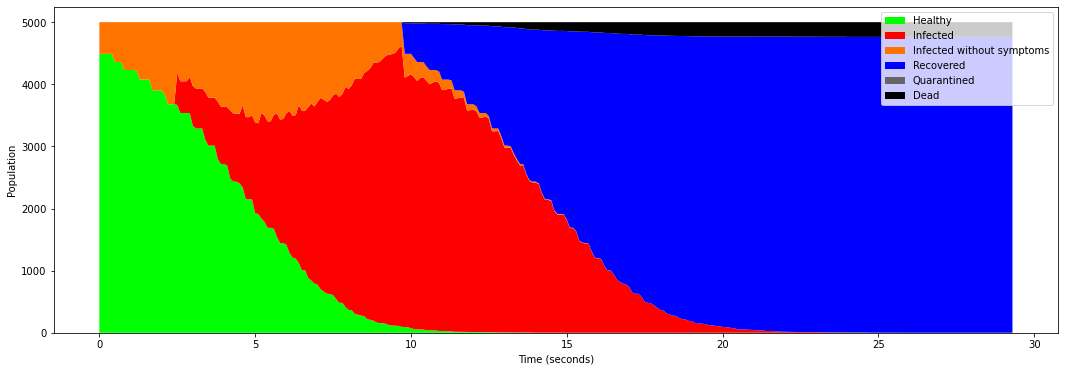

In [ ]:
def plot_results(filename: str):
    with open(filename, "r") as fp:
        data = json.load(fp)
    df = pd.json_normalize(data)
    df["time"] = df["time"].astype(int) / 1000

    plt.figure(figsize=(18, 6))

    plt.stackplot(
        df["time"],
        df["statistics.healthyCount"],
        df["statistics.infectedCount"],
        df["statistics.infectedWithoutSymptomsCount"],
        df["statistics.recoverdCount"],
        df["statistics.quarantinedCount"],
        df["statistics.deadCount"],
        colors=["#00FF00", "#FF0000", "#FF7300FF", "#0000FF", "#666666", "#000000"],
        labels=[
            "Healthy",
            "Infected",
            "Infected without symptoms",
            "Recovered",
            "Quarantined",
            "Dead",
        ],
    )

    plt.xlabel("Time (seconds)")
    plt.ylabel("Population")
    plt.legend()

plot_results("baseline.json")

In [63]:
names = [
    "baseline",
    "less-contact-x2-no-quarantine",
    "less-contact-x2-quarantine",
    "less-contact-x3-no-quarantine",
    "less-contact-x3-quarantine"
]

def generate_plots():
    for d in names:
        plot_results(f"{d}.json")
        plt.savefig(f"{d}.png", bbox_inches="tight")
        plt.close()
    
generate_plots()

In [64]:
def print_dead():
    for name in names:
        with open(f"{name}.json", "r") as fp:
            data = json.load(fp)
        df = pd.json_normalize(data)
        print(f"{name}: {df['statistics.deadCount'].iloc[-1]}")

print_dead()


baseline: 237
less-contact-x2-no-quarantine: 200
less-contact-x2-quarantine: 82
less-contact-x3-no-quarantine: 177
less-contact-x3-quarantine: 23
